# Sample: display on-sky footprints of Case 9

Footprints of Case 9 Challenge 00 are illustrated.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import warpfield as w

In [2]:
from astropy.coordinates import SkyCoord, Longitude, Latitude, Angle
from astropy.time import Time
from astropy.table import QTable, unique
import astropy.units as u

In [3]:
from warpfield.DUMMY import get_jasmine

The sources and telescope pointings are retrieved from the data tables.
Since the `case9_challenge_00.txt` table contains duplicated sources, the sources are sifted by the `unique()` function on `catalog_id`.

In [4]:
catalog = unique(QTable.read('../challenge/case9/case9_challenge_00.txt', format='ascii.ipac'),'catalog_id')
pointing = QTable.read('../challenge/case9/case9_challenge_00_pointing.txt', format='ascii.ipac')
source = SkyCoord(ra=catalog['ra'], dec=catalog['dec'])

The center of the field of view is defined to illustrate the distribution of the sources. Note that the `mean()` method works only when the pointings do not corss the meridian.

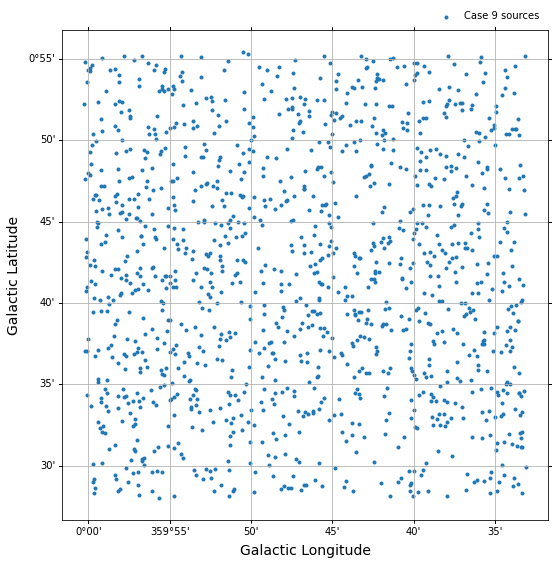

In [5]:
center = pointing.to_pandas().mean()
fov_center = SkyCoord(center.ra*u.deg,center.dec*u.deg).galactic
ax = w.display_sources(fov_center, source, marker='.', title='Case 9 sources')

Construct the `telescope` instances from the pointing table.
The `overlay_footprints()` method illustrates the telescope footprint on the given axis.
The sources are illustrated in the _Galactic_ coordinates, whle the telescope is defined in the _ICRS_ coordinates.
Thus, you have to set `frame='galactic'` to obtain the footprint in the _Galactic_ coordinates.

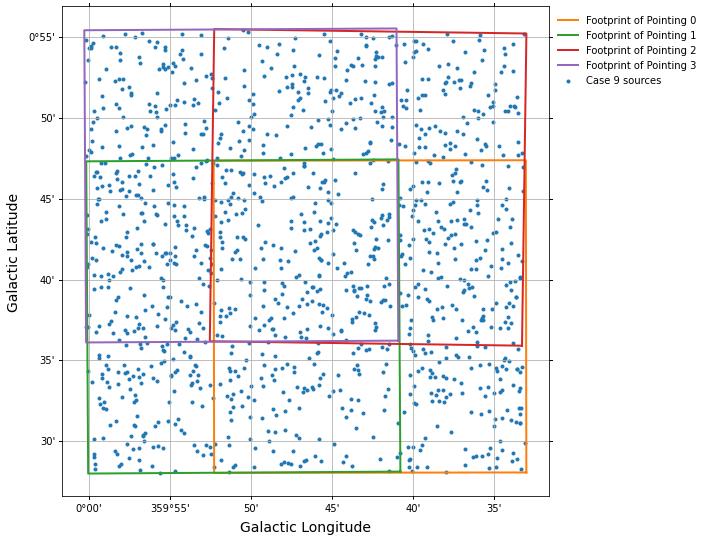

In [6]:
fov = [get_jasmine(SkyCoord(rec['ra'],rec['dec']),Angle(rec['pa'])) for rec in pointing]
ax = w.display_sources(fov_center, source, marker='.', title='Case 9 sources')
for n,tel in enumerate(fov):
    tel.overlay_footprints(ax, frame='galactic', 
        color=f'C{n+1}', lw=2, label=f'Footprint of Pointing {n}')
ax.legend(bbox_to_anchor=[1,1], loc='upper left', frameon=False)
plt.show()

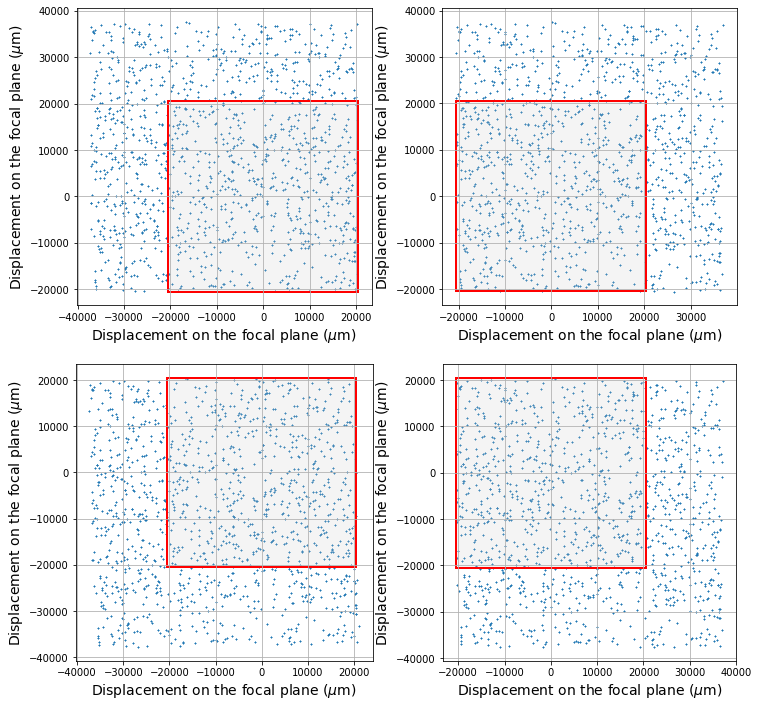

In [7]:
fig = plt.figure(figsize=(12,12))
axes = fig.subplots(2,2).flatten()
for n,ax in enumerate(axes):
    fov[n].display_focal_plane(source, axis=ax)